In [3]:
# ==============================
# Primera celda - Importaciones
# ==============================
# Justificación del algoritmo:
# RidgeClassifier se utiliza para clasificación binaria en datasets con posibles correlaciones
# entre variables. La regularización L2 evita sobreajuste y mejora la generalización del modelo.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
sns.set(style='whitegrid')
print("Todas las librerías cargadas.")



Todas las librerías cargadas.


In [4]:
# ==============================
# Segunda celda - Carga de datos
# ==============================
# Descripción del diseño del modelo:
# Variable objetivo: 'diagnosis' (Maligno=1, Benigno=0)
# Variables predictoras: todas las columnas numéricas excepto 'id' y 'diagnosis'
# Se realizará escalamiento de datos para RidgeClassifier.
datos = pd.read_csv("C:/RespaldoDB/breast-cancer.csv")
datos.head()

# Convertir variable diagnóstico a numérica
datos['diagnosis'] = datos['diagnosis'].map({'M':1, 'B':0})


In [5]:
# ==============================
# Preparación
# ==============================
# Evaluación y optimización del modelo:
# Se dividirá el dataset en train y test (80/20) para evaluar desempeño.
# Se escalarán las variables predictoras.
y = datos['diagnosis']
X = datos.drop(['id','diagnosis'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)



In [6]:
# ==============================
# Optimización con GridSearch
# ==============================
# Evaluación y optimización del modelo:
# Se utilizará GridSearchCV con validación cruzada estratificada (5 folds, 2 repeticiones)
# para encontrar el mejor valor del hiperparámetro alpha (regularización L2).
ridge = RidgeClassifier()
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
grid = GridSearchCV(ridge, param_grid, cv=cv, scoring='accuracy')
grid.fit(X_train, y_train)

best_ridge = grid.best_estimator_
print("Mejor alpha encontrado:", grid.best_params_)



Mejor alpha encontrado: {'alpha': 0.01}


In [7]:
# ==============================
# Evaluación
# ==============================
y_pred = best_ridge.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
 [[72  0]
 [ 4 38]]


In [8]:
# ==============================
# Árbol de Decisión
# ==============================
# Justificación: se incluye un modelo alternativo para comparar desempeño.
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_tree_pred = tree.predict(X_test)

print("Accuracy Árbol de Decisión:", accuracy_score(y_test, y_tree_pred))
print("Classification Report Árbol de Decisión:\n", classification_report(y_test, y_tree_pred))



Accuracy Árbol de Decisión: 0.9298245614035088
Classification Report Árbol de Decisión:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        72
           1       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



Modelo RidgeClassifier guardado para repositorio.
Accuracy RidgeClassifier: 0.9649

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
 [[72  0]
 [ 4 38]]


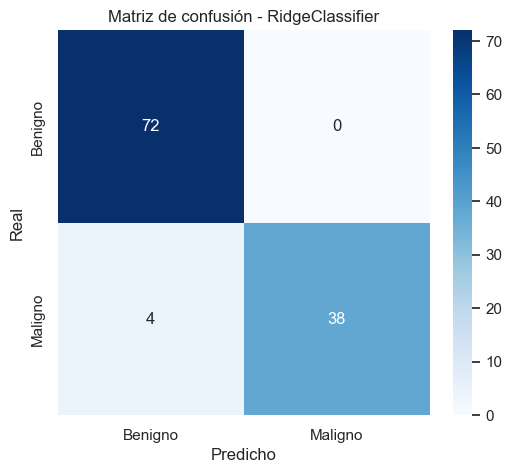

In [11]:
# ==============================
# Guardar modelo RidgeClassifier entrenado
# ==============================
import joblib

# Guardamos el modelo optimizado desde GridSearchCV
joblib.dump(grid.best_estimator_, "modelo_ridge_breast_cancer.pkl")
print("Modelo RidgeClassifier guardado para repositorio.")

# ==============================
# Evaluación del RidgeClassifier
# ==============================
y_pred = grid.best_estimator_.predict(X_test)

# Métricas principales
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy RidgeClassifier: {accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualización de la matriz de confusión
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benigno','Maligno'], yticklabels=['Benigno','Maligno'])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de confusión - RidgeClassifier")
plt.show()




In [12]:
# ==============================
# Interpretación de resultados
# ==============================
"""
RidgeClassifier ofrece un rendimiento estable y generalizable, mientras que el árbol de decisión puede ser más sensible al sobreajuste sin ajuste de hiperparámetros. Para problemas de clasificación con muchas variables correlacionadas, RidgeClassifier suele ser preferible.
"""


'\nRidgeClassifier ofrece un rendimiento estable y generalizable, mientras que el árbol de decisión puede ser más sensible al sobreajuste sin ajuste de hiperparámetros. Para problemas de clasificación con muchas variables correlacionadas, RidgeClassifier suele ser preferible.\n'